<a href="https://colab.research.google.com/github/Nyraa1/MLProjectsRepo/blob/master/Linear_Regression_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
adv=pd.read_csv('Advertising.csv')

In [ ]:
adv

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
adv.shape

(200, 5)

In [ ]:
adv.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


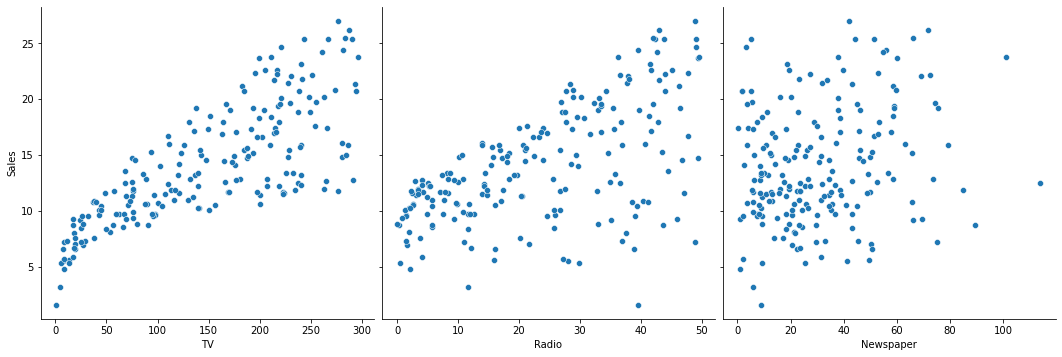

In [ ]:
sns.pairplot(adv, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5, kind = 'scatter')

<AxesSubplot:>

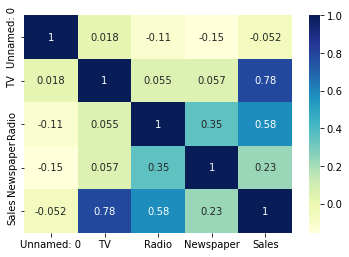

In [ ]:
sns.heatmap(adv.corr(),cmap="YlGnBu", annot=True)

In [ ]:
x=adv['TV']
y=adv['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=5)

In [ ]:
x_train

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [ ]:
x_train.head()

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
Name: TV, dtype: float64

In [ ]:
x_test

119     19.4
77     120.5
148     38.0
149     44.7
154    187.8
151    121.0
122    224.0
6       57.5
28     248.8
71     109.8
188    286.0
34      95.7
21     237.4
40     202.5
55     198.9
104    238.2
3      151.5
39     228.0
117     76.4
134     36.9
180    156.6
26     142.9
54     262.7
165    234.5
53     182.6
93     250.9
174    222.4
17     281.4
56       7.3
84     213.5
25     262.9
156     93.9
42     293.6
141    193.7
50     199.8
51     100.4
195     38.2
116    139.2
142    220.5
24      62.3
159    131.7
62     239.3
166     17.9
45     175.1
23     228.3
1       44.5
162    188.4
48     227.2
160    172.5
126      7.8
123    123.1
107     90.4
43     206.9
152    197.6
114     78.2
46      89.7
172     19.6
102    280.2
61     261.3
115     75.1
Name: TV, dtype: float64

In [ ]:
import statsmodels.api as sm


In [ ]:
x_train_sm=sm.add_constant(x_train)
x_train_sm

,const,TV
170,1.0,50.0
182,1.0,56.2
59,1.0,210.7
185,1.0,205.0
12,1.0,23.8
...,...,...
73,1.0,129.4
144,1.0,96.2
118,1.0,125.7
189,1.0,18.7


In [ ]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [ ]:
lr.params

const    6.745302
TV       0.050244
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.64e-32
Time:                        12:30:29   Log-Likelihood:                -363.07
No. Observations:                 140   AIC:                             730.1
Df Residuals:                     138   BIC:                             736.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7453      0.535     12.605      0.000       5.687       7.803
TV             0.0502      0.003     15.702      0.000       0.044       0.057
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.973
Skew:                          -0.201   Prob(JB):                        0.615
Kurtosis:                       2.932   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

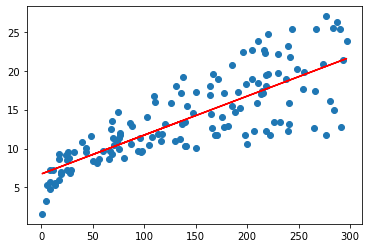

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,0.05*x_train+6.74,'r')
plt.show()

In [ ]:
y_train_p=lr.predict(x_train_sm)
residue=(y_train-y_train_p)
residue

170   -0.857478
182   -0.868988
59     1.068389
185    5.554777
12     1.258902
         ...   
73    -2.246813
144   -0.178728
118    2.839088
189   -0.984856
99     3.661775
Length: 140, dtype: float64

Text(0, 0.5, 'freq')

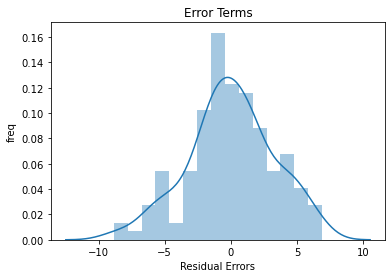

In [ ]:
sns.distplot(residue, bins = 15)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

<AxesSubplot:ylabel='Density'>

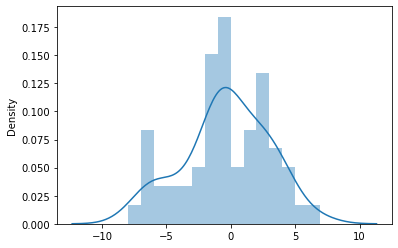

In [ ]:
x_test_sm=sm.add_constant(x_test)

y_test_p=lr.predict(x_test_sm)
res_test=(y_test-y_test_p)
sns.distplot(res_test,bins=15)

In [ ]:
#checking the quality or strength (R2)
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_test_p)

In [ ]:
r_square

0.5111616978794153

In [ ]:
#Gradient descent
from sklearn.model_selection import train_test_split
x_train_lm,x_test_lm,y_train_lm,y_test_lm=train_test_split(x,y,train_size=.7,test_size=.3,random_state=5)

In [ ]:
x_train_lm=x_train_lm.values.reshape(-1,1)
x_test_lm=x_test_lm.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train_lm,y_train_lm)


LinearRegression()

In [ ]:
lm.intercept_

6.745302251222065